### Задача

Проанализировать данные российской авиакомпании, выполняющей более сотни перелётов каждый день. Выявить предпочтения пользователей, покупающих билеты на те или иные направления.

### Импорт библиотек и настройки

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

sns.set(style='whitegrid')

### Импорт и проверка данных

In [17]:
model_flight = pd.read_csv('./query_1.csv')
model_flight.info()

city_flight = pd.read_csv('./query_3.csv')
city_flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


Названия столбцов единообразны, пропущенных значений нет, корректные типы данных. 

Проверим наличие дубликатов.

In [18]:
model_flight.duplicated().sum()

0

In [19]:
city_flight.duplicated().sum()

0

### Анализ данных

Топ-10 городов по количеству рейсов.

In [20]:
top_city = city_flight.sort_values(by='average_flights', ascending=False).head(10)
top_city

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


Построим графики.

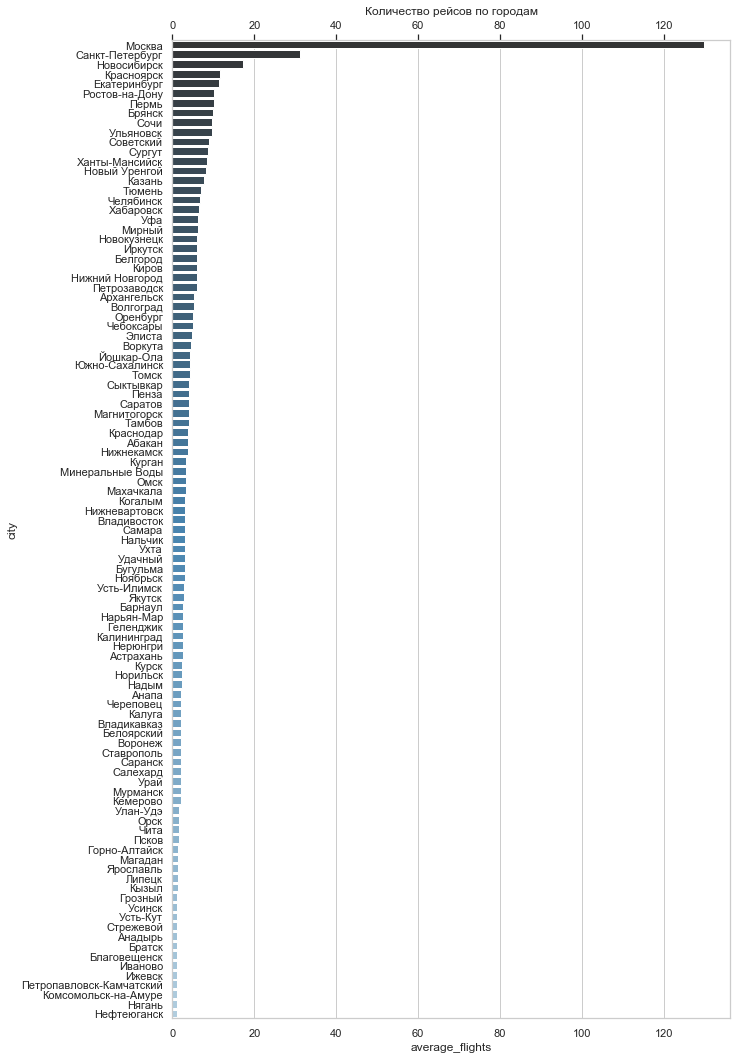

In [21]:
plt.subplots(figsize=(10,18))
plt.title('Количество рейсов по городам')

ax = sns.barplot(
     data=city_flight.sort_values(by='average_flights', ascending=False),
     y='city',
     x='average_flights',
     palette='Blues_d'
)

ax.tick_params(top=True, labeltop=True)

Среднее количество рейсов, прибывающих в Москву за день в августе 2018 года, сильно выделяется по сравнению с остальными значениями. Высокое значение связано не только с прямыми рейсами, но и с транзитными, так как Москва связывает разные воздушные линии.  
В большинстве городов число рейсов меньше 10. 


Рассмотрим отдельно топ-10 городов.

Text(0.5, 1.0, 'Топ-10 городов по количеству рейсов')

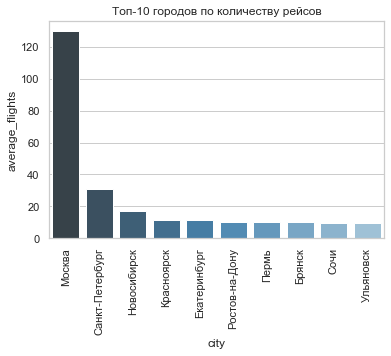

In [22]:
sns.barplot(
    data=top_city.sort_values(by='average_flights', ascending=False),
    y='average_flights',
    x='city',
    palette='Blues_d'
)
plt.xticks(rotation=90)
plt.title('Топ-10 городов по количеству рейсов')

Столица России осуществила 51,8% рейсов среди топ-10. Второй по популярности город - Санкт-Петербург. Третий - Новосибирск. По населению это также самые крупные города России. Далее значения почти не выделяются.  
В топ-10 попали международные аэропорты. Так как временный интервал (август 2018) - один из самых популярных месяцев для отдыха, популярность аэропортов, совершающих рейсы в другие страны, может возрастать. Также в это время люди приезжают отдыхать в крупные города России. 



Text(0.5, 1.0, 'Количество рейсов на каждую модель')

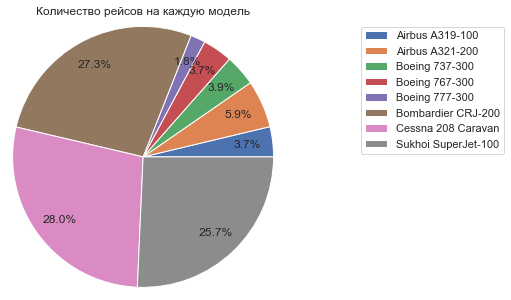

In [25]:
pie_top = model_flight.plot(
    kind='pie', autopct='%1.1f%%', 
    y='flights_amount', labels=None, figsize=(5, 5), pctdistance=0.8, radius=1.2)

pie_top.set_ylabel('')
pie_top.legend(model_flight['model'],loc='best', bbox_to_anchor=(1.28, 1))
plt.title('Количество рейсов на каждую модель')

Больше всего рейсов совершили - Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoi SuperJet-100. Airbus и Boeing в совокупности имеют примерно одинаковое количество рейсов - около 9% и сильно уступают лидерам.  
Стоит отметить, что такая разница обусловлена вместимостью самолетов, в топ-3 попали модели с минимальной вместимостью, в то время как Airbus и Boeing вмещают намного больше пассажиров.



### Вывод

Столица России осуществила больше всего рейсов. Второй по популярности город - Санкт-Петербург. Третий - Новосибирск.  
В топ-10 попали международные аэропорты крупных городов.  
Больше всего рейсов совершили - Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoi SuperJet-100 с минимальной вместимостью пассажиров средней и малой дальности. Airbus и Boeing с большей вместимостью совершили меньше рейсов, в совокупности они имеют примерно одинаковое количество рейсов - около 9%.
